## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 3
#### Кластеризация
### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Фаик Карим Яссерович

### Вариант №_17

***

Вариант 17 

Japanese Credit Screening Data Set  

Название файла: crx.data 

Ссылка: https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/  

Первый признак: A2 (столбец No 2) 

Второй признак: A8 (столбец No 8)  

Класс: A16 (столбец No 16) 

Алгоритмы: K-means, BIRCH, OPTICS, Spectral Clustering 

Меры качества: F-мера, парные меры TP, FN, FP, TN, индекс Жаккара 

Найти лучший алгоритм кластеризации относительно меры качества: индекс Жаккара 

##### 1. Считайте из заданного набора данных репозитария UCI значения двух признаков и метки класса.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
my_data = pd.read_csv('crx.data', sep=',', header=None) 
my_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [3]:
my_data = my_data[[1,7,15]]
my_data

,1,7,15
0,30.83,1.25,+
1,58.67,3.04,+
2,24.50,1.50,+
3,27.83,3.75,+
4,20.17,1.71,+
...,...,...,...
685,21.08,1.25,-
686,22.67,2.00,-
687,25.25,2.00,-
688,17.92,0.04,-


##### 2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на медианные значения того класса, к которому относится запись с пропущенным значением в признаке.

In [4]:
import warnings
warnings.filterwarnings("ignore")
print('Пропущенных значений:')
for col in my_data.columns:
    print('\t%s: %d' % (col,my_data[col].isna().sum()))

Пропущенных значений:
	1: 0
	7: 0
	15: 0


In [5]:
 my_data[15]

0      +
1      +
2      +
3      +
4      +
      ..
685    -
686    -
687    -
688    -
689    -
Name: 15, Length: 690, dtype: object

##### 3. Если количество различных меток класса больше пяти, то объедините некоторые (наименее многочисленные) классы, чтобы общее количество классов не превышало пять.

In [6]:
unique_values_count = my_data.iloc[:, 2].nunique()
unique_values_count

2

не встречается более двух различных значений. объединение не требуется

##### 4. Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

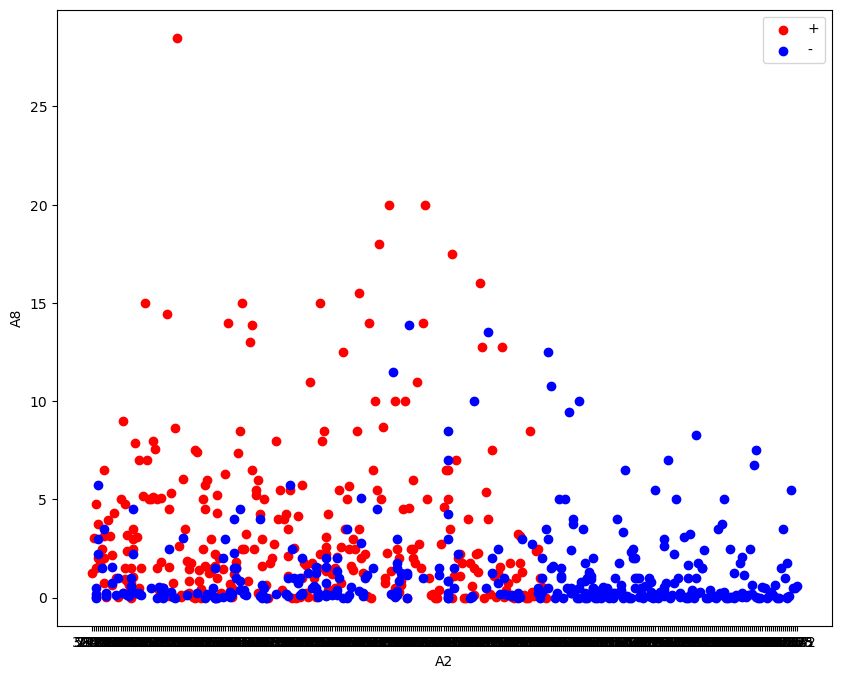

In [7]:
import matplotlib.pyplot as plt

colors = ['red', 'blue']

plt.figure(figsize=(10, 8))
plt.xlabel('A2')
plt.ylabel('A8')

# Разделяем данные по классам
positive_data = my_data[my_data.iloc[:, 2] == '+']
negative_data = my_data[my_data.iloc[:, 2] == '-']

# Добавляем точки для каждого класса
plt.scatter(positive_data.iloc[:, 0], positive_data.iloc[:, 1], color='red', label='+')
plt.scatter(negative_data.iloc[:, 0], negative_data.iloc[:, 1], color='blue', label='-')

plt.legend()


##### 5. Проведите кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в индивидуальном задании, для случая, когда количество кластеров равно количеству классов в исходном наборе (с учетом корректировки). В случае отсутствия сходимости алгоритма измените аргументы по умолчанию или используйте для кластеризации случайную выборку из набора данных.

Алгоритмы: K-means, BIRCH, OPTICS, Spectral Clustering 

In [8]:
my_data2 = my_data.iloc[:, [0, 1]]
my_data2

,1,7
0,30.83,1.25
1,58.67,3.04
2,24.50,1.50
3,27.83,3.75
4,20.17,1.71
...,...,...
685,21.08,1.25
686,22.67,2.00
687,25.25,2.00
688,17.92,0.04


In [9]:
print(my_data2.isnull().sum())
my_data2 = my_data2.replace('?', np.nan)
for col in my_data2.columns:
    if my_data2[col].dtype == 'object':
        my_data2[col] = pd.to_numeric(my_data2[col], errors='coerce')


1    0
7    0
dtype: int64


In [10]:
my_data2 = my_data2.fillna(my_data2.median()) 

In [11]:
from sklearn.cluster import KMeans
model1 = KMeans(n_clusters=2)
model1.fit(my_data2)
yhat1 = model1.predict(my_data2)

yhat1

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [12]:
from sklearn.cluster import Birch
model2 = Birch(n_clusters=2)
model2.fit(my_data2)
yhat2 = model2.predict(my_data2)

yhat2
#plot_cluster(my_data2,yhat2)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [13]:
from sklearn.ensemble import IsolationForest
from sklearn.cluster import OPTICS

model3 = OPTICS(eps=0.05, min_samples=30)

clf = IsolationForest(contamination=0.1)
my_data2_cleaned = clf.fit_predict(my_data2).reshape(-1, 1)

yhat3 = model3.fit_predict(my_data2_cleaned)

yhat3

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [14]:
from sklearn.cluster import SpectralClustering
model4 = SpectralClustering(n_clusters=2) 
yhat4 = model4.fit_predict(my_data2)

yhat4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

##### 6. Для каждого из алгоритмов кластеризации, указанных в индивидуальном задании, постройте матрицу сопряженности, используя функцию contingency_matrix() из scikit-learn, и найдите значения мер качества кластеризации, указанные в индивидуальном задании.

Меры качества: F-мера, парные меры TP, FN, FP, TN, индекс Жаккара 

In [15]:
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import confusion_matrix # матрицы ошибок для парных мер
from sklearn.metrics import f1_score # для нахождения F-меры
from sklearn.metrics import jaccard_score # для нахождения индекса Жаккара

Kmeans

In [16]:
true_labels = my_data.iloc[:, 2].map({'-': 0, '+': 1})

matrix_Kmeans = contingency_matrix(true_labels, yhat1)
print(matrix_Kmeans)

conf_matrix = confusion_matrix(true_labels, yhat1)
TN, FP, FN, TP = conf_matrix.ravel()
print("True Positives (TP):", TP)
print("False Negatives (FN):", FN)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)

f_measure = f1_score(true_labels, yhat1)
print("F-measure:", f_measure)

jaccard_index = jaccard_score(true_labels, yhat1)
print("Jaccard Index:", jaccard_index)

[[307  76]
 [198 109]]
True Positives (TP): 109
False Negatives (FN): 198
False Positives (FP): 76
True Negatives (TN): 307
F-measure: 0.4430894308943089
Jaccard Index: 0.2845953002610966


Birch

In [17]:
true_labels = my_data.iloc[:, 2].map({'-': 0, '+': 1})

matrix_Birch = contingency_matrix(true_labels, yhat2)
print(matrix_Birch)

conf_matrix = confusion_matrix(true_labels, yhat2)
TN, FP, FN, TP = conf_matrix.ravel()
print("True Positives (TP):", TP)
print("False Negatives (FN):", FN)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)

f_measure = f1_score(true_labels, yhat2)
print("F-measure:", f_measure)

jaccard_index = jaccard_score(true_labels, yhat2)
print("Jaccard Index:", jaccard_index)

[[360  23]
 [271  36]]
True Positives (TP): 36
False Negatives (FN): 271
False Positives (FP): 23
True Negatives (TN): 360
F-measure: 0.19672131147540986
Jaccard Index: 0.10909090909090909


OPTICS

In [18]:
true_labels = my_data.iloc[:, 2].map({'-': 0, '+': 1})

matrix_OPTICS = contingency_matrix(true_labels, yhat3)
print(matrix_OPTICS)

conf_matrix = confusion_matrix(true_labels, yhat3)
TN, FP, FN, TP = conf_matrix.ravel()
print("True Positives (TP):", TP)
print("False Negatives (FN):", FN)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)

f_measure = f1_score(true_labels, yhat3)
print("F-measure:", f_measure)

jaccard_index = jaccard_score(true_labels, yhat3)
print("Jaccard Index:", jaccard_index)

[[363  20]
 [258  49]]
True Positives (TP): 49
False Negatives (FN): 258
False Positives (FP): 20
True Negatives (TN): 363
F-measure: 0.26063829787234044
Jaccard Index: 0.14984709480122324


SpectralClustering

In [19]:
true_labels = my_data.iloc[:, 2].map({'-': 0, '+': 1})

matrix_SpectralClustering = contingency_matrix(true_labels, yhat4)
print(matrix_SpectralClustering)

conf_matrix = confusion_matrix(true_labels, yhat4)
TN, FP, FN, TP = conf_matrix.ravel()
print("True Positives (TP):", TP)
print("False Negatives (FN):", FN)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)

f_measure = f1_score(true_labels, yhat4)
print("F-measure:", f_measure)

jaccard_index = jaccard_score(true_labels, yhat4)
print("Jaccard Index:", jaccard_index)

[[383   0]
 [306   1]]
True Positives (TP): 1
False Negatives (FN): 306
False Positives (FP): 0
True Negatives (TN): 383
F-measure: 0.006493506493506494
Jaccard Index: 0.003257328990228013


##### 7. Определите алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании.

Оптимальная мера качества по варианту 17: индекс Жаккара 

На основании всего вышевысчитанного, наивысший индекс Жаккара имеет алгоритм Kmeans (Jaccard Index: 0.2845953002610966)

##### 8. Для оптимального алгоритма кластеризации из предыдущего пункта визуализируйте области принятия решения и набор данных в виде точек на плоскости с координатами, соответствующими двум признакам, отображая точки различных кластеров разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

In [20]:
np_my_data2 = my_data2.to_numpy()
np_my_data2

array([[3.083e+01, 1.250e+00],
       [5.867e+01, 3.040e+00],
       [2.450e+01, 1.500e+00],
       ...,
       [2.525e+01, 2.000e+00],
       [1.792e+01, 4.000e-02],
       [3.500e+01, 8.290e+00]])

In [21]:
h = 0.01 

x_min, x_max = np_my_data2[:, 0].min(), np_my_data2[:, 0].max()
y_min, y_max = np_my_data2[:, 1].min(), np_my_data2[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [22]:
Z.shape

(2850, 6650)

In [23]:
my_data2[0] = model1.labels_
my_data2.head()

,1,7,0
0,30.83,1.25,0
1,58.67,3.04,1
2,24.50,1.50,0
3,27.83,3.75,0
4,20.17,1.71,0


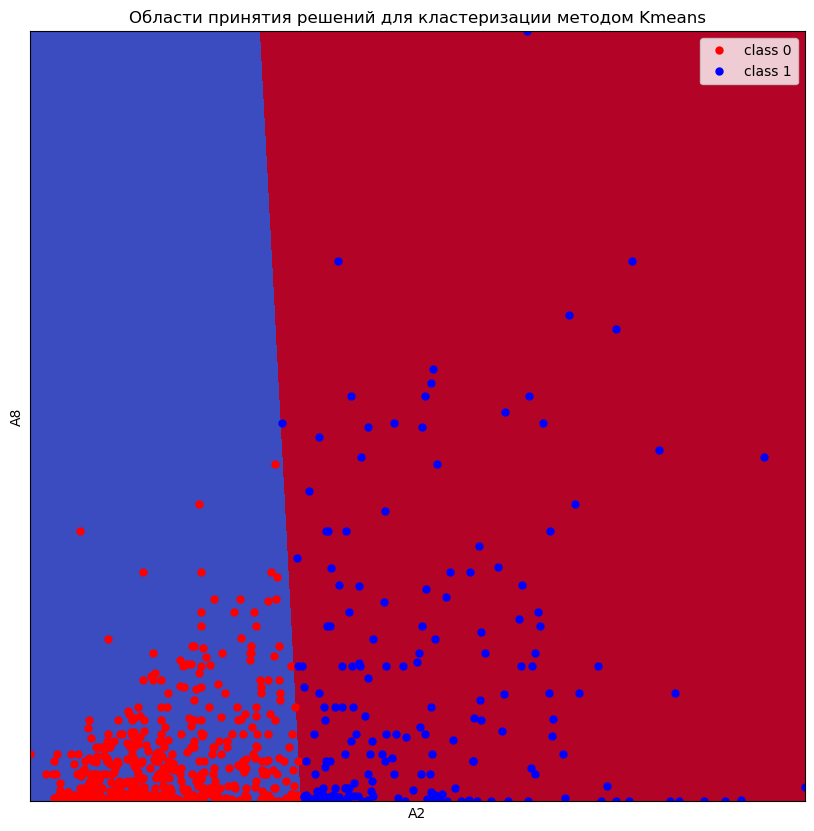

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.coolwarm, 
    aspect="auto",
    origin="lower",
)

colors = ["ro", "bo"]

for i in np.sort(my_data2[0].unique()):
  classes = my_data2.loc[my_data2[0] == i]
  plt.plot(classes[1], classes[7], colors[i],markersize=5, label=str(i))

plt.title("Области принятия решений для кластеризации методом Kmeans")
plt.xlabel("A2")
plt.ylabel("A8")
plt.legend(labels=["class 0", "class 1"])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(());